In [84]:
import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

from tifffile import imread, imsave

%reload_ext autoreload
%autoreload 2

from kymographs import KymoSpider

Populating the interactive namespace from numpy and matplotlib


In [92]:
folder = '/Users/jug/Repositories/GIT/BobSeg/export/'

stack1 = imread(folder+'stack01.tiff')
stack1 = np.swapaxes(stack1,0,1)
stack2 = imread(folder+'stack02.tiff')
stack2 = np.swapaxes(stack2,0,1)
stack = np.concatenate([stack1,stack2],axis=1)

seg1 = imread(folder+'seg01.tiff')
seg2 = imread(folder+'seg02.tiff')
seg = np.concatenate([seg1,seg2])

flow1 = imread(folder+'flow01.tiff')
flow1 = np.swapaxes(flow1,0,1)
flow2 = imread(folder+'flow02.tiff')
flow2 = np.swapaxes(flow2,0,1)
flow = np.concatenate([flow1,flow2],axis=1)

In [99]:
ks = KymoSpider(5,80,(175,265),rotation=180)

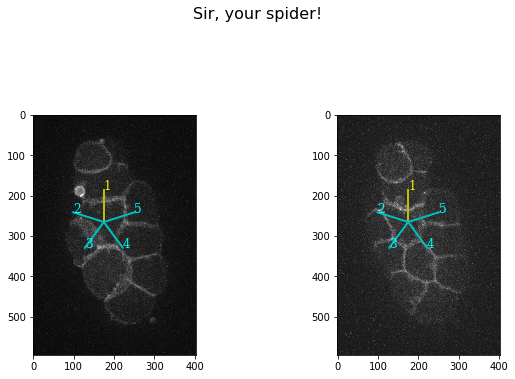

In [100]:
pylab.rcParams['figure.figsize'] = (10, 15)
fig = plt.figure()
ks.plot_spider_loc_on_images(fig,stack[1],flow)

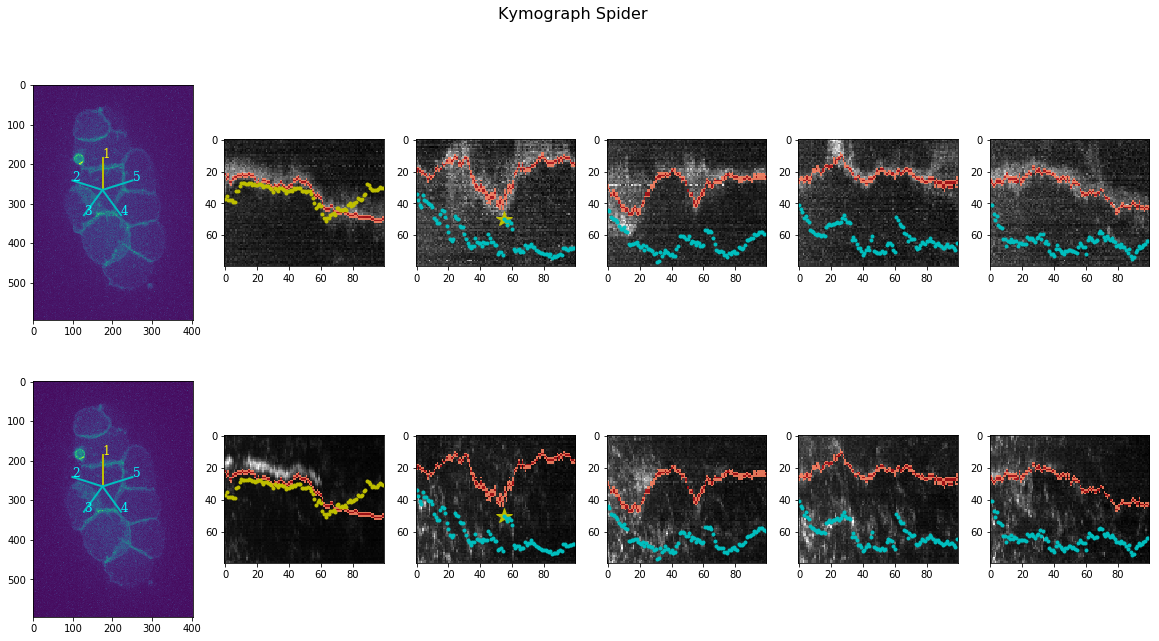

In [102]:
ks.compute(stack[1],stack[0],seg,flow)

pylab.rcParams['figure.figsize'] = (20, 10)
fig = plt.figure()
ks.plot(fig,stack[1][0],stack[1][1],15,True)
fig.savefig('/Users/jug/Desktop/muh.png')